In [1]:
!pip install networkx matplotlib

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous


In [3]:
def get_path(previous, end):
    path = []
    while end in previous:
        path.insert(0, end)
        end = previous[end]
    path.insert(0, end)
    return path

In [9]:
def visualize_graph(graph, path=None, layout_type='spring'):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Pilih tata letak
    if layout_type == 'circular':
        pos = nx.circular_layout(G)
    elif layout_type == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                               edge_color='red', width=3)

    plt.title("Visualisasi Graf")
    plt.axis('off')
    plt.show()

Jarak dari A ke Z: 6
Jalur: A → C → X → Z


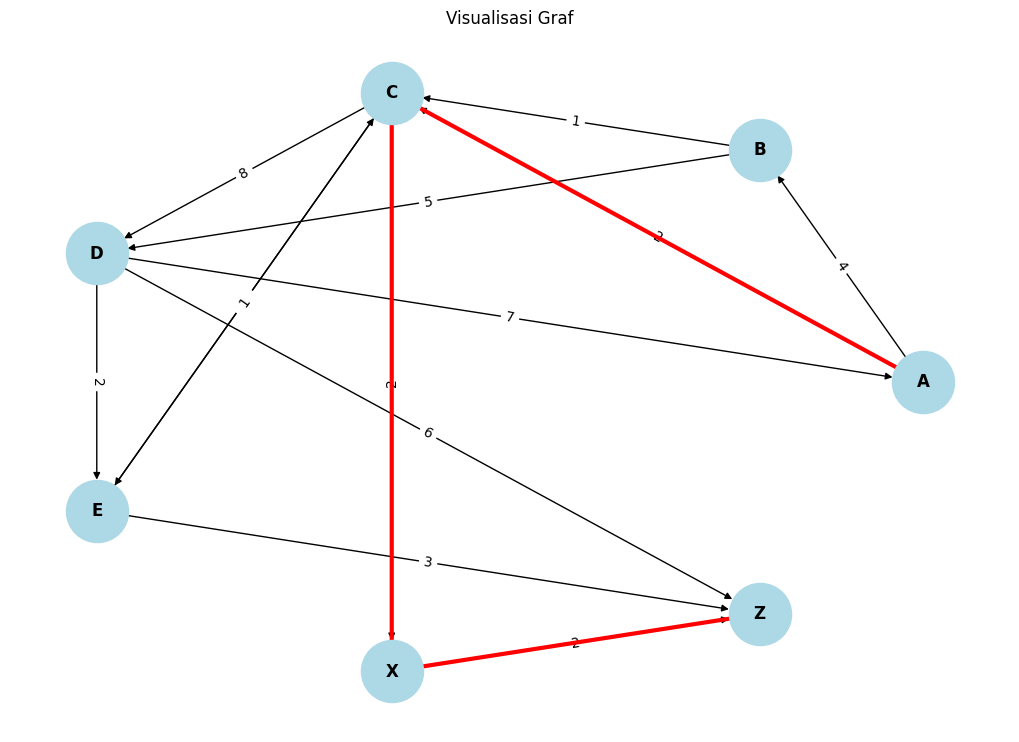

In [12]:
# Definisi graph yang sudah dimodifikasi
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10, 'X': 2},
    'D': {'E': 2, 'Z': 6, 'A': 7},
    'E': {'Z': 3, 'C': 1},
    'X': {'Z': 2},
    'Z': {}
}
# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, 'A')

# Rekonstruksi jalur
shortest_path = get_path(previous, 'Z')
print(f"Jarak dari A ke Z: {distances['Z']}")
print(f"Jalur: {' → '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path, layout_type='circular')